In [56]:
# Dependencies 
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# eia_key = "hnganXoNL7eOFqDf1Yl1BLUgpfw6Yf5cq3vDw13K"


In [57]:
# base url
base_url = "https://api.eia.gov/v2/electricity/state-electricity-profiles/summary/data/"

In [58]:
# set params
parameters = {
    "api_key": "hnganXoNL7eOFqDf1Yl1BLUgpfw6Yf5cq3vDw13K",
    "frequency": "annual",
    "data[0]": "average-retail-price",
    "facets[stateID][]": [
            "AK",
            "AL",
            "AR",
            "AZ",
            "CA",
            "CO",
            "CT",
            "DC",
            "DE",
            "FL",
            "GA",
            "HI",
            "IA",
            "ID",
            "IL",
            "IN",
            "KS",
            "KY",
            "LA",
            "MA",
            "MD",
            "ME",
            "MI",
            "MN",
            "MO",
            "MS",
            "MT",
            "NC",
            "ND",
            "NE",
            "NH",
            "NJ",
            "NM",
            "NV",
            "NY",
            "OH",
            "OK",
            "OR",
            "PA",
            "RI",
            "SC",
            "SD",
            "TN",
            "TX",
            "US",
            "UT",
            "VA",
            "VT",
            "WA",
            "WI",
            "WV",
            "WY"
        ],
    "start": "2021",
    "end": "2021",
    "sort[0][column]": "period",
    "sort[0][direction]": "asc",
    "offset": "0",
    "length": "5000",
}


In [59]:

response = requests.get(base_url, params=parameters)
data = response.json()

In [60]:
print(json.dumps(data, indent=4, sort_keys=True))

{
    "apiVersion": "2.1.2",
    "request": {
        "command": "/v2/electricity/state-electricity-profiles/summary/data/",
        "params": {
            "api_key": "hnganXoNL7eOFqDf1Yl1BLUgpfw6Yf5cq3vDw13K",
            "data": [
                "average-retail-price"
            ],
            "end": 2021,
            "facets": {
                "stateID": [
                    "AK",
                    "AL",
                    "AR",
                    "AZ",
                    "CA",
                    "CO",
                    "CT",
                    "DC",
                    "DE",
                    "FL",
                    "GA",
                    "HI",
                    "IA",
                    "ID",
                    "IL",
                    "IN",
                    "KS",
                    "KY",
                    "LA",
                    "MA",
                    "MD",
                    "ME",
                    "MI",
                    "MN",
          

In [61]:
# Convert to df
eia = pd.DataFrame(data["response"]["data"])
eia

,period,stateID,stateDescription,average-retail-price,average-retail-price-units
0,2021,NV,Nevada,8.58,cents per kilowatthour
1,2021,UT,Utah,8.34,cents per kilowatthour
2,2021,OH,Ohio,9.76,cents per kilowatthour
3,2021,OK,Oklahoma,8.52,cents per kilowatthour
4,2021,OR,Oregon,8.95,cents per kilowatthour
5,2021,PA,Pennsylvania,9.97,cents per kilowatthour
6,2021,AK,Alaska,20.02,cents per kilowatthour
7,2021,AL,Alabama,10.18,cents per kilowatthour
8,2021,AR,Arkansas,9.10,cents per kilowatthour
9,2021,AZ,Arizona,10.73,cents per kilowatthour


In [62]:
# read csv

pop = "data/population.csv"
temp = "data/temperature.csv"

pop_df = pd.read_csv(pop)
temp_df = pd.read_csv(temp)


pop_temp = pd.merge(pop_df, temp_df, how="left", on=["stateDescription"])

In [63]:
all_data = pd.merge(pop_temp, eia, how="left", on=["stateDescription"])
all_data

,period_x,stateDescription,population,Unnamed: 3,Unnamed: 4,period_y,Avg °F,Avg °C,Rank,period,stateID,average-retail-price,average-retail-price-units
0,2021.0,Alabama,"5,049,846",NaN,NaN,2021.0,62.8,17.1,7.0,2021.0,AL,10.18,cents per kilowatthour
1,2021.0,Alaska,"734,182",NaN,NaN,2021.0,26.6,-3.0,50.0,2021.0,AK,20.02,cents per kilowatthour
2,2021.0,Arizona,"7,264,877",NaN,NaN,2021.0,60.3,15.7,10.0,2021.0,AZ,10.73,cents per kilowatthour
3,2021.0,Arkansas,"3,028,122",NaN,NaN,2021.0,60.4,15.8,9.0,2021.0,AR,9.10,cents per kilowatthour
4,2021.0,California,"39,142,991",NaN,NaN,2021.0,59.4,15.2,12.0,2021.0,CA,19.65,cents per kilowatthour
5,2021.0,Colorado,"5,811,297",NaN,NaN,2021.0,45.1,7.3,39.0,2021.0,CO,10.90,cents per kilowatthour
6,2021.0,Connecticut,"3,623,355",NaN,NaN,2021.0,49.0,9.4,29.0,2021.0,CT,18.32,cents per kilowatthour
7,2021.0,Delaware,"1,004,807",NaN,NaN,2021.0,55.3,12.9,16.0,2021.0,DE,10.50,cents per kilowatthour
8,2021.0,District of Columbia,"668,791",NaN,NaN,NaN,NaN,NaN,NaN,2021.0,DC,12.81,cents per kilowatthour
9,2021.0,Florida,"21,828,069",NaN,NaN,2021.0,70.7,21.5,1.0,2021.0,FL,10.67,cents per kilowatthour


In [64]:
all_data1 = all_data.drop(columns=["Unnamed: 3", "Unnamed: 4", "period_y", "period_x"])

In [65]:
all_data2 = all_data1.drop([8, 15, 16, 41, 51])
all_data2.rename(columns={
    "stateDescription": "state",
    "stateID": "stateID",
    "Avg °F": "Avg °F",
    "Avg °C": "Avg °C",
    "period": "year",
    "average-retail-price": "average-retail-price",
    "average-retail-price-units": "average-retail-price-units",
})

all_data2

,stateDescription,population,Avg °F,Avg °C,Rank,period,stateID,average-retail-price,average-retail-price-units
0,Alabama,"5,049,846",62.8,17.1,7.0,2021.0,AL,10.18,cents per kilowatthour
1,Alaska,"734,182",26.6,-3.0,50.0,2021.0,AK,20.02,cents per kilowatthour
2,Arizona,"7,264,877",60.3,15.7,10.0,2021.0,AZ,10.73,cents per kilowatthour
3,Arkansas,"3,028,122",60.4,15.8,9.0,2021.0,AR,9.10,cents per kilowatthour
4,California,"39,142,991",59.4,15.2,12.0,2021.0,CA,19.65,cents per kilowatthour
5,Colorado,"5,811,297",45.1,7.3,39.0,2021.0,CO,10.90,cents per kilowatthour
6,Connecticut,"3,623,355",49.0,9.4,29.0,2021.0,CT,18.32,cents per kilowatthour
7,Delaware,"1,004,807",55.3,12.9,16.0,2021.0,DE,10.50,cents per kilowatthour
9,Florida,"21,828,069",70.7,21.5,1.0,2021.0,FL,10.67,cents per kilowatthour
10,Georgia,"10,788,029",63.5,17.5,5.0,2021.0,GA,10.43,cents per kilowatthour


In [66]:
all_data2["average-retail-price"].describe()

count    47.000000
mean     11.758298
std       4.394533
min       8.170000
25%       9.110000
50%       9.970000
75%      12.205000
max      30.310000
Name: average-retail-price, dtype: float64

In [67]:
all_data2["Avg °F"].describe()

count    47.000000
mean     52.125532
std       8.901233
min      26.600000
25%      45.250000
50%      51.700000
75%      59.200000
max      70.700000
Name: Avg °F, dtype: float64

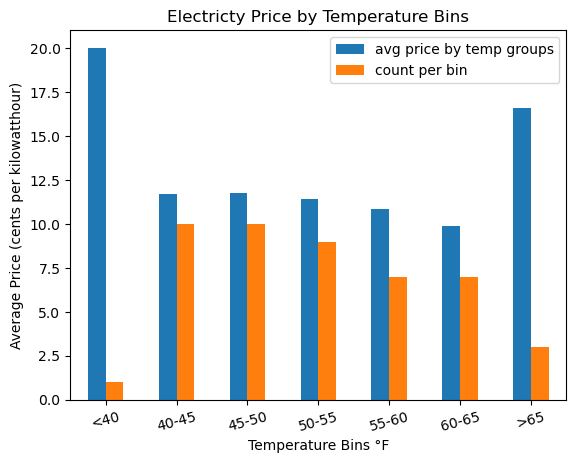

In [68]:
temp_bins = [0, 40, 45, 50, 55, 60, 65, 71]
labels = ["<40", "40-45", "45-50", "50-55", "55-60", "60-65", ">65"]

all_data2["temperature bins"] = pd.cut(all_data2["Avg °F"], bins=temp_bins, labels=labels)

all_data2

temp_price_avg = all_data2.groupby(["temperature bins"]).mean()["average-retail-price"]
temp_bins_count = all_data2.groupby(["temperature bins"]).count()["stateDescription"]

test = {
    "avg price by temp groups": temp_price_avg,
    "count per bin": temp_bins_count,
}

test_2 = pd.DataFrame(test)
bins_bar = test_2.plot.bar(rot=15)
bins_bar.set_ylabel("Average Price (cents per kilowatthour)") 
bins_bar.set_xlabel("Temperature Bins °F")
bins_bar.set_title("Electricty Price by Temperature Bins")
plt.savefig("visualizations/electricty_price_by_temperature_bins")

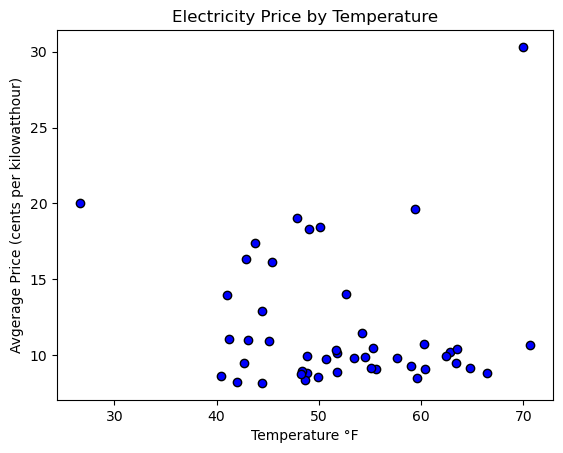

In [69]:
# Scatter
x_axis = all_data2["Avg °F"]
y_axis = all_data2["average-retail-price"]
temp_scatter = plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black")
temp_scatter = plt.title("Electricity Price by Temperature")
temp_scatter = plt.xlabel("Temperature °F")
temp_scatter = plt.ylabel("Avgerage Price (cents per kilowatthour)")
plt.savefig("visualizations/electricity_price_by_temp")

In [70]:
# region data

region = "data/region_data.csv"

region_df = pd.read_csv(region)


all_data3 = pd.merge(region_df, all_data2, how="inner", on=["stateDescription"])

renamed = all_data3.rename(columns={"stateID_x": "stateID"})
final_df = renamed.drop(columns="stateID_y")
clean_df = final_df.drop([1, 10])

In [71]:
# region bins

region_temp = clean_df.groupby(["region"]).mean()["Avg °F"]
region_price = clean_df.groupby(["region"]).mean()["average-retail-price"]

region_dict = {
    "average temperature °F": region_temp,
    "average retail price (cents per kilowatthour)": region_price,
}

regions_df = pd.DataFrame(region_dict)
regions_df

,average temperature °F,average retail price (cents per kilowatthour)
region,,
Midwest,47.400000,10.291111
Northeast,48.281818,15.050909
Southeast,62.180000,9.685000
Southwest,57.500000,9.365000
West,47.644444,10.121111


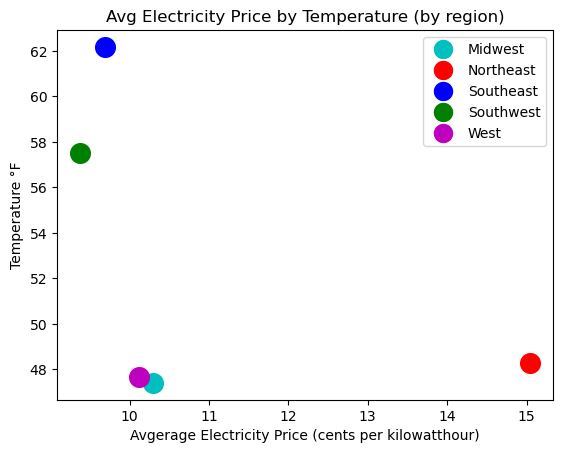

In [126]:
mw_x = [10.29]
mw_y = [47.40]

ne_x = [15.05]
ne_y = [48.28]

se_x = [9.69]
se_y = [62.18]

sw_x = [9.37]
sw_y = [57.50]

w_x = [10.12]
w_y = [47.64]

regions_scatter = plt.scatter(mw_x, mw_y, s=200, c='c')
regions_scatter = plt.scatter(ne_x, ne_y, s=200, c='r')
regions_scatter = plt.scatter(se_x, se_y, s=200, c='b')
regions_scatter = plt.scatter(sw_x, sw_y, s=200, c='g')
regions_scatter = plt.scatter(w_x, w_y, s=200, c='m')

regions_scatter = plt.title("Avg Electricity Price by Temperature (by region)")
regions_scatter = plt.xlabel("Avgerage Electricity Price (cents per kilowatthour)")
regions_scatter = plt.ylabel("Temperature °F")

legend_elements = [Line2D([0], [0], marker="o", color="w", label="Midwest", markerfacecolor="c", markersize=15),
                   Line2D([0], [0], marker="o", color="w", label="Northeast", markerfacecolor="r", markersize=15),
                   Line2D([0], [0], marker="o", color="w", label="Southeast", markerfacecolor="b", markersize=15),
                   Line2D([0], [0], marker="o", color="w", label="Southwest", markerfacecolor="g", markersize=15),
                   Line2D([0], [0], marker="o", color="w", label="West", markerfacecolor="m", markersize=15)]


regions_scatter = plt.legend(legend_elements, ["Midwest", "Northeast", "Southeast", "Southwest", "West"])
plt.savefig("visualizations/electricity_price_by_temperature_(by_region)")

<Figure size 640x480 with 0 Axes>